# 라이브러리 로드

In [3]:
from model.pytorch.inception.dataset import ImageDataset
from collections import Counter
import matplotlib.pyplot as plt

# 학습데이터 로드

In [5]:
trn_dataset = ImageDataset('dataset/casting_data/train')
val_dataset = ImageDataset('dataset/casting_data/test')
print(f'trn: {len(trn_dataset)}, val: {len(val_dataset)}')

trn: 6633, val: 715


# 학습데이터 이미지 정보

In [26]:
print("학습데이터 클래스 종류", trn_dataset.label_map)

학습데이터 클래스 종류 {'normal': 0, 'defect': 1}


In [10]:
counter = Counter(trn_dataset.label_idx)

In [11]:
y = []
for idx in range(len(counter)):
    y.append(counter[idx])    

### 이미지 데이터 개수 확인

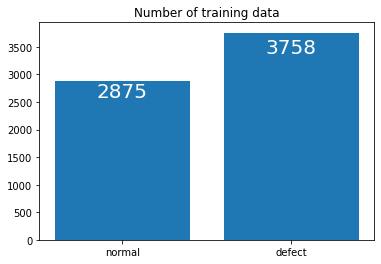

In [29]:
plt.bar(trn_dataset.label_map.keys(), y)
for index, value in enumerate(y):
    plt.text(index, value - (value*0.1), str(value), color='white', size = 20, horizontalalignment="center")

plt.title('Number of training data')
plt.show()

In [13]:
defect = list(filter(lambda x : x.find('ok') == -1, trn_dataset.file_path))
normal = list(filter(lambda x : x.find('ok') != -1, trn_dataset.file_path))

### 이미지 크기 확인

In [28]:
import cv2
sample_image = cv2.imread(normal[0])
sample_image.shape

(300, 300, 3)

### 학습데이터 이미지 확인

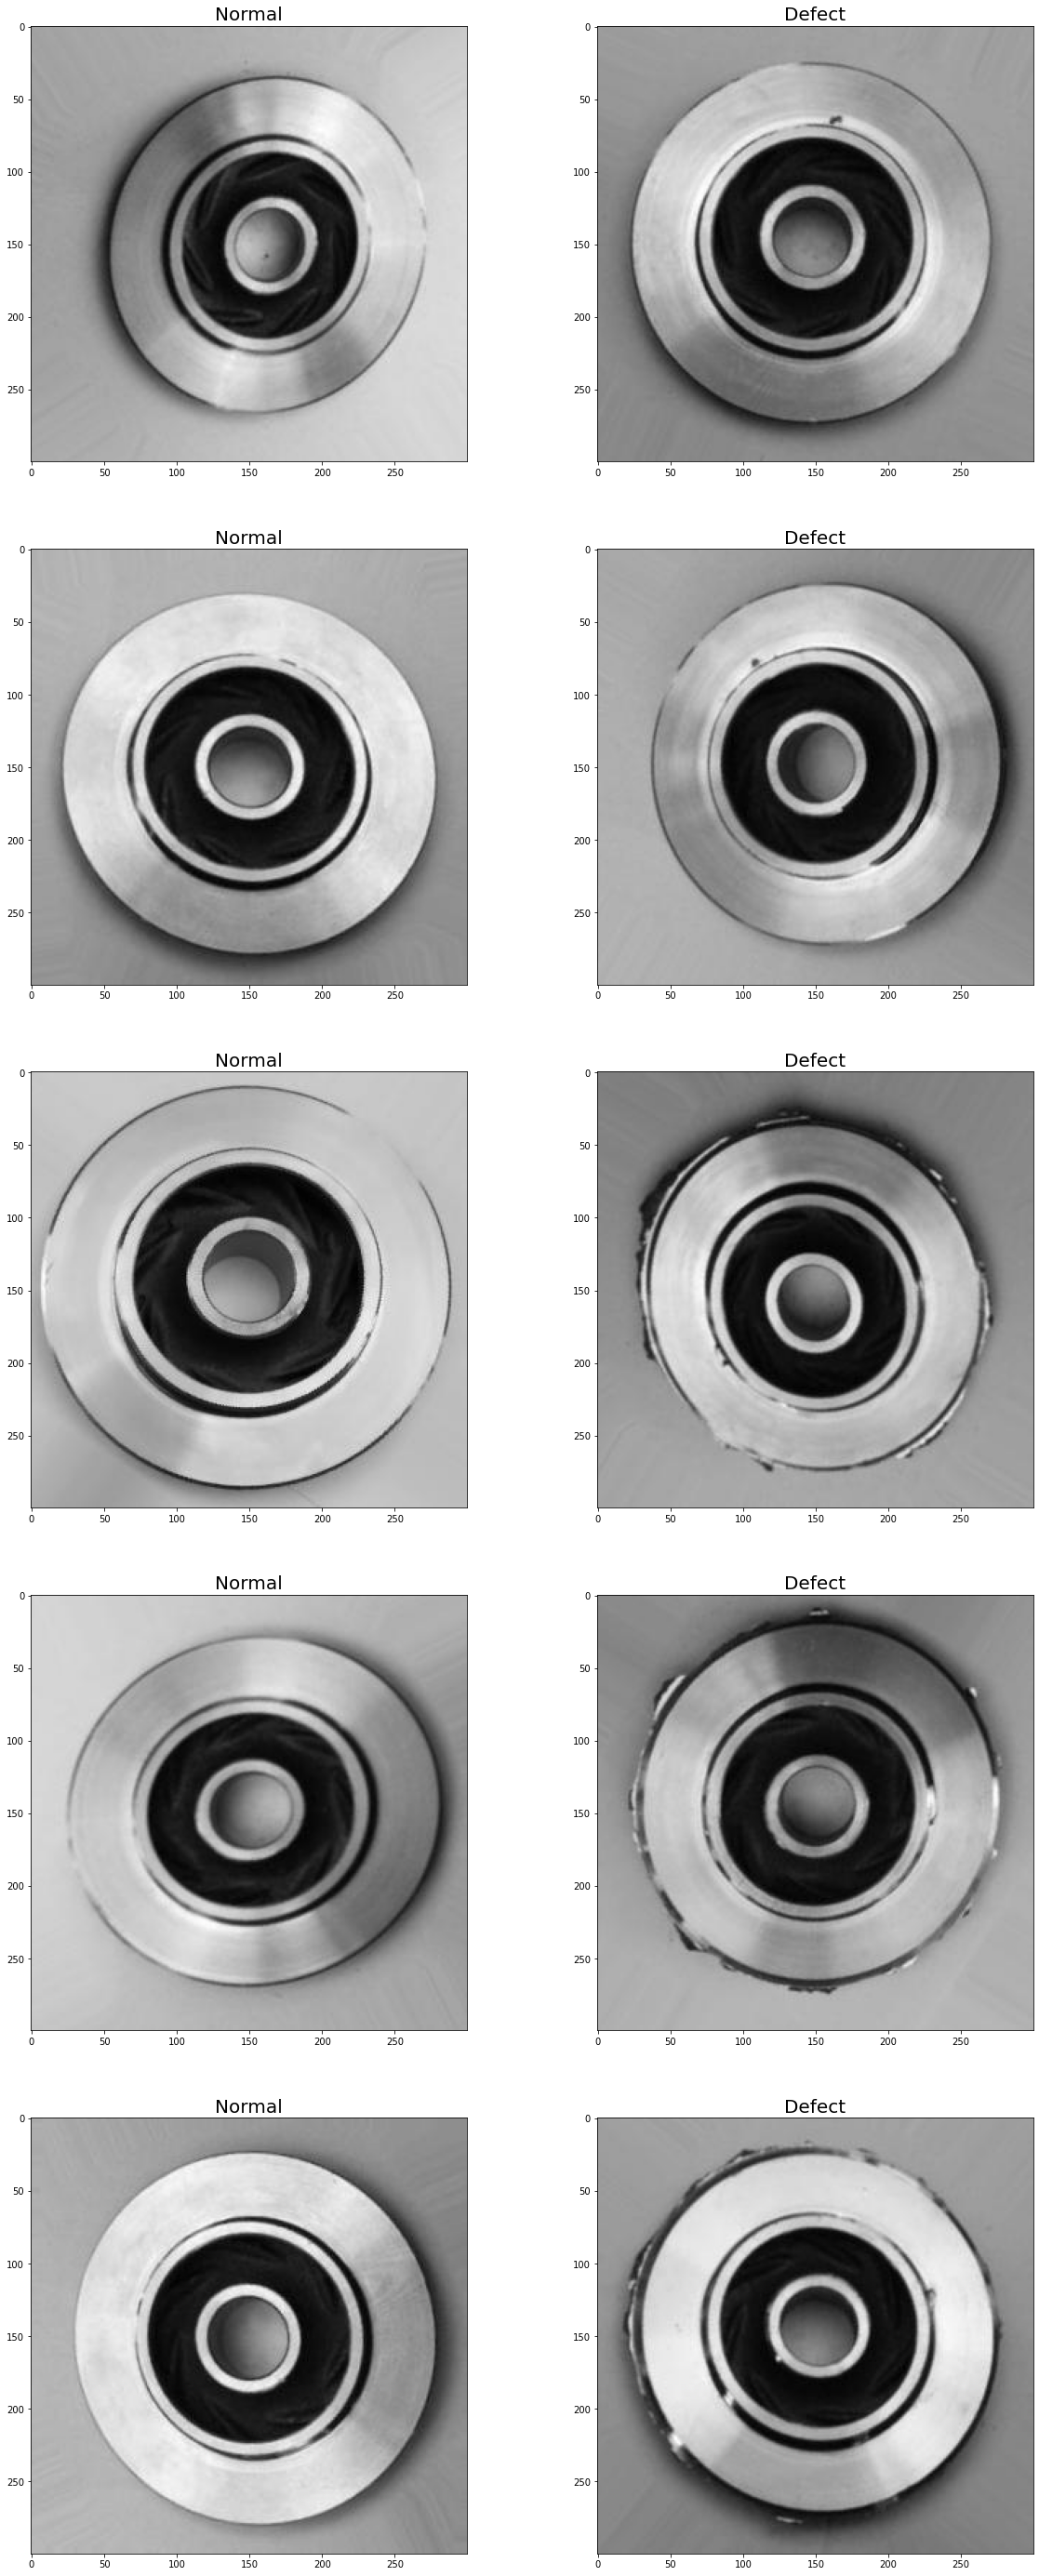

In [16]:
fig = plt.figure(figsize=(20, 50))
rows = 5
cols = 2

for idx in range(0, rows):
    img1 = cv2.imread(normal[idx])
    img2 = cv2.imread(defect[idx])

    ax1 = fig.add_subplot(rows, cols, idx*2+1)
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title('Normal', size = 20)

    ax2 = fig.add_subplot(rows, cols, idx*2+2)
    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax2.set_title('Defect', size = 20)

plt.show()

# 모델 학습
* --data_path 학습데이터셋의 위치 지정
*  --epochs 학습 횟수
* --batch_size 배치 사이즈
* --check_points 모델 저장 위치
    * 가장 좋은 결과는 model_state_dict_best.pt
    * 마지막 학습 결과는 model_state_dict_latest.pt 라는 이름으로 저장됨

In [22]:
!python3 model/pytorch/inception/train.py --epochs 2 \
    --data_path dataset/casting_data/train \
    --checkpoints_path check_points/inception

2022-10-27 06:57:46,036 - trn: 4643, val: 1990
2022-10-27 06:57:46,040 - Load on cuda
2022-10-27 06:57:49,038 - epoch 1
100%|###########################################| 73/73 [00:31<00:00,  2.29it/s]
2022-10-27 06:58:20,940 - trn, duration:  31.9s, acc:0.4316, loss:0.0181
100%|###########################################| 32/32 [00:04<00:00,  7.42it/s]
2022-10-27 06:58:25,263 - val, duration:   4.3s, acc:0.5965, loss:0.0617
2022-10-27 06:58:25,263 - epoch 2
100%|###########################################| 73/73 [00:32<00:00,  2.24it/s]
2022-10-27 06:58:57,899 - trn, duration:  32.6s, acc:0.4458, loss:0.0177
100%|###########################################| 32/32 [00:04<00:00,  7.24it/s]
2022-10-27 06:59:02,330 - val, duration:   4.4s, acc:0.4734, loss:0.0417


# 모델 예측
* --data_path 테스트 데이터셋의 위치 지정
* --model_path 로드할 모델의 위치

In [24]:
!python3 model/pytorch/inception/inference.py --data_path dataset/casting_data/test \
    --model_path check_points/inception/model_state_dict_best.pt

2022-10-27 07:17:40,890 - model loading..
2022-10-27 07:17:44,143 - dataset loading..
2022-10-27 07:17:44,147 - loaded dataset : 715
2022-10-27 07:17:44,148 - inferencing images..
2022-10-27 07:17:44,284 - 1/715 - dataset/casting_data/test/defect/cast_def_0_1493.jpeg, Predicted : defect, Actual : defect, Correct : True, loss : 2.2112460136413574
2022-10-27 07:17:44,320 - 2/715 - dataset/casting_data/test/defect/cast_def_0_1539.jpeg, Predicted : normal, Actual : defect, Correct : False, loss : -0.7370016574859619
2022-10-27 07:17:44,355 - 3/715 - dataset/casting_data/test/defect/cast_def_0_159.jpeg, Predicted : defect, Actual : defect, Correct : True, loss : 6.557346820831299
2022-10-27 07:17:44,391 - 4/715 - dataset/casting_data/test/defect/new__0_2091.jpeg, Predicted : defect, Actual : defect, Correct : True, loss : 5.325473785400391
2022-10-27 07:17:44,427 - 5/715 - dataset/casting_data/test/defect/cast_def_0_1186.jpeg, Predicted : defect, Actual : defect, Correct : True, loss : 6.18